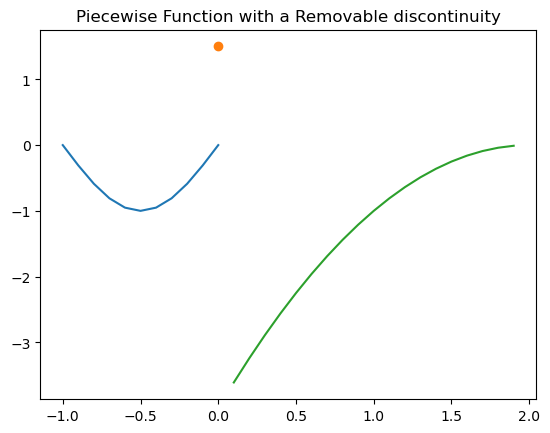

In [35]:
############# DISCONTINUITIES IN FUNCTIONS #################

import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

## Set up a piecewise function using lists with elements representing the cases
# set up x input
resolution = .1
xx = np.arange(-1,2,resolution)

# list function pieces
y = [0] * 3 # initialize list as 3 elements, all zeros
# replace each el with the function definition of the piece
y[0] = np.sin(xx*np.pi)
y[1] = 1.5*np.ones(len(xx)) # across all values of x
y[2] = -(xx-2)**2

# list domains - each list outputs an array of boolens based on the condition/domain 
xdomains = [0] * 3
xdomains[0] = xx < 0 # first condition/subdomain
# the second condition is x == 0, but the numpy array does not have zero, just numbers very close to zero
# you can find the elements that are as close as possible to 0 (or a very small number)
xdomains[1] = np.abs(xx) < resolution/2 # divide the small resolution by 2 to get a very small number - find elements that are below this and so basically zero
xdomains[2] = xx > 0

# plot the results for all the pieces (elements of y)

# use markers for each piece, the 2nd piece will not be visible otherwise since it is listed as an infinitesimal point on the plot
markers = '-o-' # a line, a circle, and a line
for i in range(len(y)):
    # cut up xx into the elements that satisfy the subdomains above
    plt.plot(xx[xdomains[i]],y[i][xdomains[i]], markers[i]) # plot the inputs on x-axis to the i-th element in y (the i-th element is a list of the outputs for that case and same length as xx)

plt.title('Piecewise Function with a Removable discontinuity')
plt.show()

The piecewise function:


Piecewise((sin(pi*x), x < 0), (1.5, Eq(x, 0)), (-(x - 2)**2, x > 0))

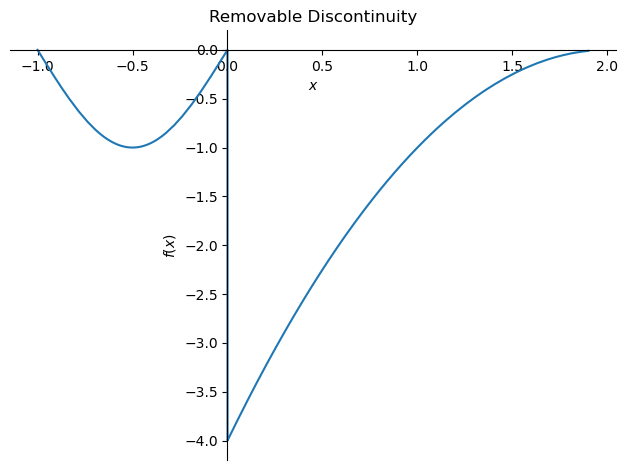

'When x = 0: 1.50000000000000'

In [36]:
#### Using Sympy instead of Numpy #####

from sympy.abc import x

fx = sym.Piecewise(
    (sym.sin(x*sym.pi), x < 0),
    (1.5, sym.Eq(x, 0)), # when x == 0, use sym.Eq()
    (-(x-2)**2, x > 0)
)

print('The piecewise function:')
display(fx)

sym.plot(fx, (x, xx[0], xx[-1]), title='Removable Discontinuity') # pass in the domain for x to get the right x-axis range - re-use the xx numpy array to get the first and last number for the range

# sympy by default connects all the parts of the function and interprets the discontinuity at x = 1.5 for the x==0 domain condition as still part of the function so draws the vertical line
# we need to tell sympy to substitute the value with 0


display(f'When x = 0: {fx.subs(x, 0)}') # verify that the output of substituting x with 0 results in 1.5 as per the second rule


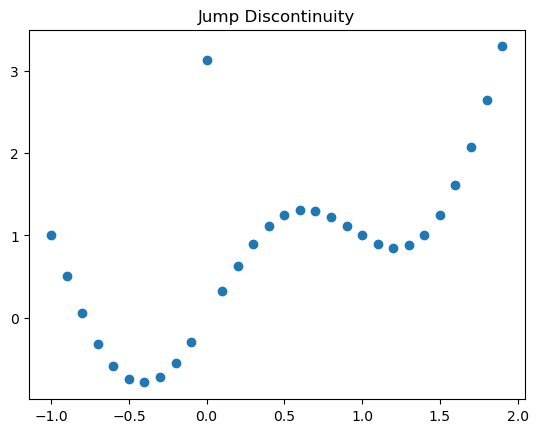

In [37]:
#### A Jump Discontinuity ####

y = np.sin(xx * np.pi) + xx**2 # the function, reuse xx numpy array
# the condition is x = 0, then pi, but again, numpy array of nums does not have any that are exactly zero
  # we need to tell python to satisfy the condition if the element is as close as possible to zero
needle = 0 # the value we are trying to find, it is subtracted from each element to find what is closest to 0 (meaning the number is closest to the needle) and we pull the minimum giving us the index
y[np.argmin(np.abs(xx - needle))] = np.pi # use argmin to return the index of the minimum number of all the xx nums minus 0 (since we are looking for zero, though adding that is not specifically necessary since the target is 0)

plt.plot(xx, y, 'o')
plt.title('Jump Discontinuity')
plt.show()

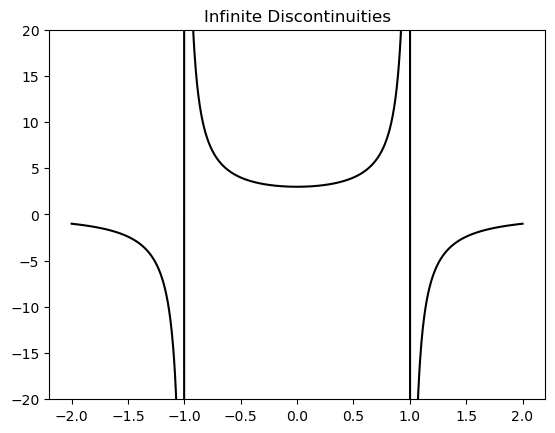

In [38]:
########## INFINITE DISCONTINUITIES ################


# Define a domain for the function we will look at to go from -2 to +2
xx = np.linspace(-2,2,1000)

fx = 3 / (1-xx**2) # division takes precedence over subtraction so use parens

plt.plot(xx,fx,'k')
# change scaling to shrink y axis range
plt.ylim([-20,20])
plt.title('Infinite Discontinuities')
plt.show()

## Note the Singularities as x approaches -1 and +1 (there is a discontinuity to and from infinities off the graph space)

In [ ]:
## Implement Infinite discontinuity with Sympy

sfx = 3/(1-x**2) # using the symbolic x variable from sympy
display(sfx)

# find the singularities (the parts outside the continuous domains) using the function, input and sym.Interval to specify the range/domain
  # The output will show square brackets around the expression which mean inclusive bounds at the beginning and inclusive bounds at the end (i.e. exactly -2 and 2)
  # The parens (i.e. [-2,-1) ) means exclusive, not including -1 etc.
    # ***The function is not defined at exactly x=-1, or x=1 (that's where the singularities occur, the function is continuous from -2 up to, but not including -1 etc.)
    # The U symbol is a Union and just means it is combining the domains together
display(sym.calculus.util.continuous_domain(sfx, x, sym.Interval(-2,2))) # shows the continuous domains

# alternatively can use another sympy func
display(sym.singularities(sfx, x)) # shows directly the singlularities - {-1,1}

3/(1 - x**2)

Union(Interval.Ropen(-2, -1), Interval.open(-1, 1), Interval.Lopen(1, 2))

{-1, 1}

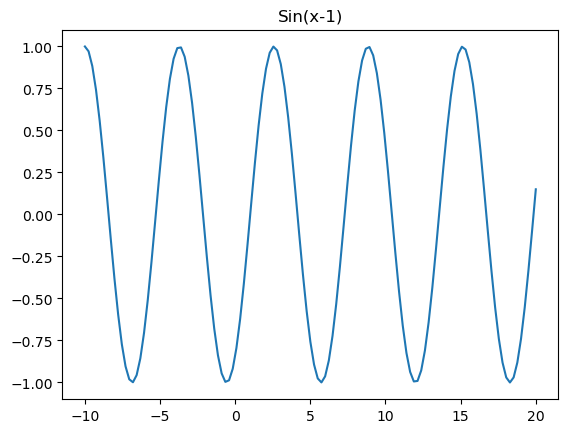

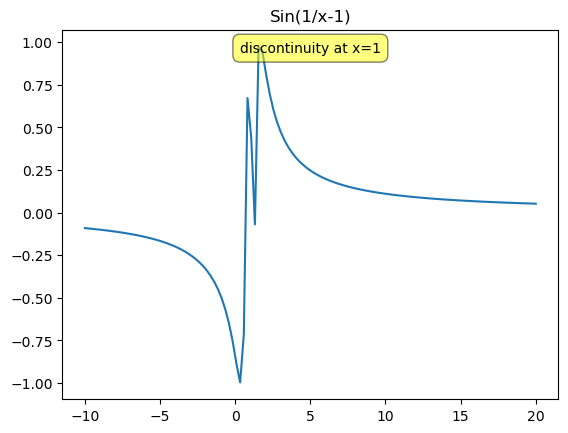

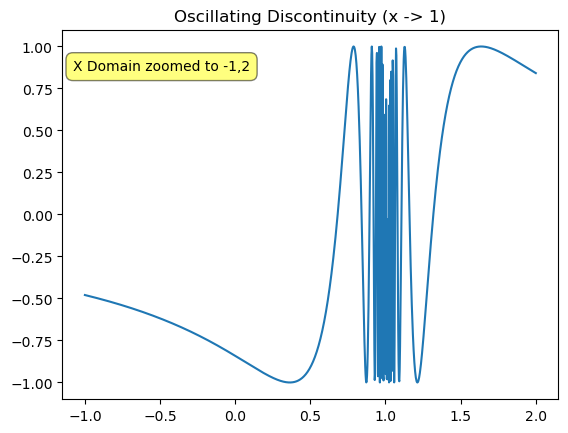

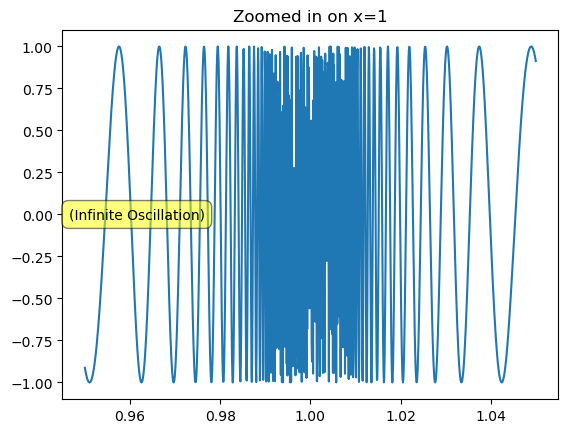

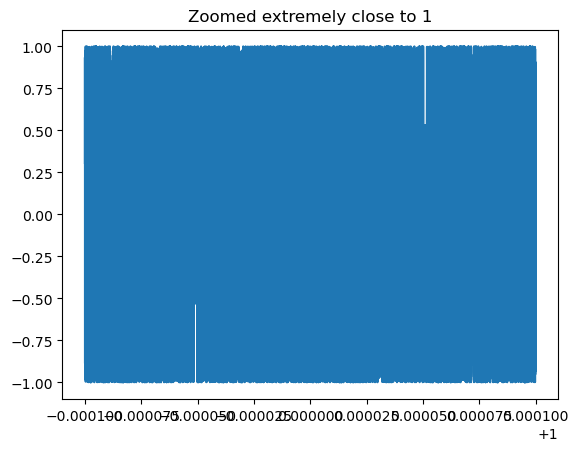

In [ ]:
##### Oscillating Discontinuity #####

xx = np.linspace(-10,20,123) # 123 numbers for the input between -1 and +2

# regular sin just to compare
fx = np.sin((xx-1))
plt.plot(xx, fx)
plt.title('Sin(x-1)')
plt.show()

# Now with x in the denominator - as x gets further from 0, the number inside of the sin gets closer and closer to zero
  # The sin of 0 is 0, so we know that the output approaches 0 as x gets further from 0 (i.e. 1/10, 1/15 etc.)
  # Conversely as x gets closer to 1, the number passed in to sin is larger and larger 
fx = np.sin(1/(xx-1))
plt.plot(xx,fx)
plt.title('Sin(1/x-1)')

plt.annotate('discontinuity at x=1', 
             xy=(0.5, .95),  # Position of the point to annotate
             xytext=(0.5, .95),  # Position of the text
             xycoords='axes fraction',  # Use axes coordinates
             textcoords='axes fraction',
             ha='center',  # Horizontal alignment
             va='center',  # Vertical alignment
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5)
)
             

plt.show()


## Zoom in by reducing the domain and we can see an oscillating discontinuity as x gets closer to 1
xx = np.linspace(-1,2,1230)
fx = np.sin(1/(xx-1))
plt.plot(xx,fx)
plt.title('Oscillating Discontinuity (x -> 1)')

plt.annotate('X Domain zoomed to -1,2', 
             xy=(0.2, .9),  # Position of the point to annotate
             xytext=(0.2, .9),  # Position of the text
             xycoords='axes fraction',  # Use axes coordinates
             textcoords='axes fraction',
             ha='center',  # Horizontal alignment
             va='center',  # Vertical alignment
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5)
)

plt.show()

#### ZOOMING IN WE SEE THE OSCILLATION GETS HIGHER AND HIGHER IN FREQUENCY INFINITELY #####

# As we zoom in more with resolution (more steps in linspace), we can see the oscillation getting faster and faster infinitely as we get closer to x = 1
  # See video https://www.udemy.com/course/pycalc1_x/learn/lecture/33947226 at timestamp 12:14

xx = np.linspace(.95,1.05,1230)
fx = np.sin(1/(xx-1))
plt.plot(xx,fx)
plt.title('Zoomed in on x=1')

plt.annotate('(Infinite Oscillation)', 
             xy=(0.15, 0.5),
             xytext=(0.15, 0.5), 
             xycoords='axes fraction',  
             textcoords='axes fraction',
             ha='center',  
             va='center', 
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5)
)

# As you zoom in there is a fractal effect
# The sin wave continuously oscillates and speeds up and never approaches a specific value

plt.show()


xx = np.linspace(.9999,1.0001,12300)
fx = np.sin(1/(xx-1))
plt.plot(xx,fx)
plt.title('Zoomed extremely close to 1')
plt.show()

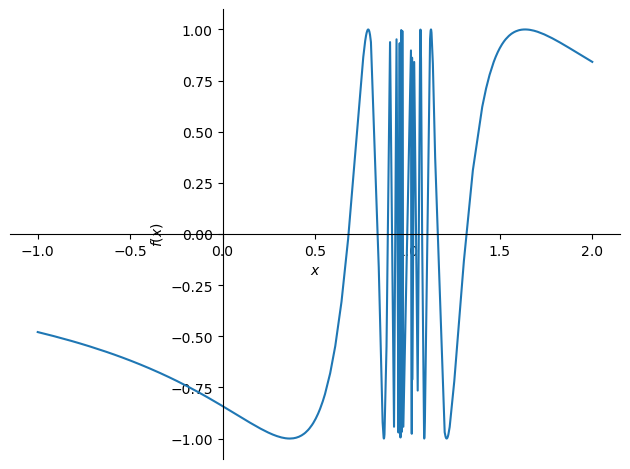

In [77]:
# Use Sympy to show oscillating discontinuity

sfx = sym.sin(1/(x-1))
p = sym.plot(sfx, (x,-1,2), show=False)
p.show()